<a href="https://colab.research.google.com/github/TriDuks/AIXuLyAnh/blob/main/Name_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Name_class/Training', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 623 images belonging to 10 classes.


In [ ]:
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
test_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True
                                  )
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Name_class/Test', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 10 images belonging to 10 classes.


In [ ]:
training_set.class_indices

In [ ]:
test_set.class_indices

# **TẠO MODEL BẰNG CNN**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
# Tạo model
model = Sequential()

In [ ]:
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
#Pooling
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#Tích chập lớp thứ 2
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size=2, strides = 2))
#Làm phẳng
model.add(Flatten())
#Connect
model.add(Dense(128, activation='relu'))
#Output
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 18, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 9, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1728)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Thiết lập thông số
a = model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Huấn luyện
model.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
20/20 [==============================] - 88s 4s/step - loss: 2.0475 - accuracy: 0.2504 - val_loss: 1.8173 - val_accuracy: 0.6000
Epoch 2/50
20/20 [==============================] - 2s 119ms/step - loss: 0.9960 - accuracy: 0.7368 - val_loss: 1.4599 - val_accuracy: 0.7000
Epoch 3/50
20/20 [==============================] - 2s 117ms/step - loss: 0.5724 - accuracy: 0.8218 - val_loss: 1.0382 - val_accuracy: 0.8000
Epoch 4/50
20/20 [==============================] - 3s 135ms/step - loss: 0.3519 - accuracy: 0.8780 - val_loss: 0.9521 - val_accuracy: 0.9000
Epoch 5/50
20/20 [==============================] - 2s 115ms/step - loss: 0.2756 - accuracy: 0.9197 - val_loss: 0.6645 - val_accuracy: 0.9000
Epoch 6/50
20/20 [==============================] - 2s 120ms/step - loss: 0.2135 - accuracy: 0.9438 - val_loss: 0.8173 - val_accuracy: 0.9000
Epoch 7/50
20/20 [==============================] - 2s 123ms/step - loss: 0.1617 - accuracy: 0.9518 - val_loss: 0.8353 - val_accuracy: 0.9000
Epoch 8/

In [30]:
model.evaluate(test_set)

1/1 [==============================] - 0s 278ms/step - loss: 2.2292 - accuracy: 0.3000


[2.229158878326416, 0.30000001192092896]

In [37]:
y_pred = model.predict_generator(test_set)
y_pred

<ipython-input-37-cbbb93cbfe82>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_set)


array([[0.11295529, 0.12231132, 0.14909717, 0.14244908, 0.09427723,
        0.06882348, 0.038341  , 0.08447737, 0.11660336, 0.07066466],
       [0.11731153, 0.12086675, 0.13813315, 0.12203175, 0.09411701,
        0.07338816, 0.04035753, 0.09691271, 0.13266629, 0.06421513],
       [0.11813413, 0.1272266 , 0.16058664, 0.12227481, 0.07914747,
        0.08844715, 0.02969115, 0.0976466 , 0.11256056, 0.06428491],
       [0.10682993, 0.13738488, 0.1293698 , 0.10790656, 0.09238837,
        0.07907807, 0.05011577, 0.10194921, 0.11886044, 0.07611694],
       [0.12156112, 0.12010511, 0.14276816, 0.12633558, 0.10522098,
        0.06287161, 0.03915765, 0.07819837, 0.13643147, 0.06734996],
       [0.11322068, 0.150867  , 0.14169085, 0.1118836 , 0.0856687 ,
        0.07066609, 0.03944879, 0.09499677, 0.12188111, 0.06967641],
       [0.11812621, 0.12495245, 0.16686943, 0.12451693, 0.09545832,
        0.0640609 , 0.03202442, 0.09823824, 0.12159705, 0.05415612],
       [0.12839183, 0.12088373, 0.1490636

In [38]:
#Chuyển đổi ma trận
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 2, 2, 1, 2, 1, 2, 2, 2, 2])

In [39]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
plt.plot(a.hi)

AttributeError: ignored

In [40]:
# Lưu a h5 file
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/AI/Name_class/model_inception.h5')

In [41]:

from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/AI/Name_class/model_inception.h5')
model

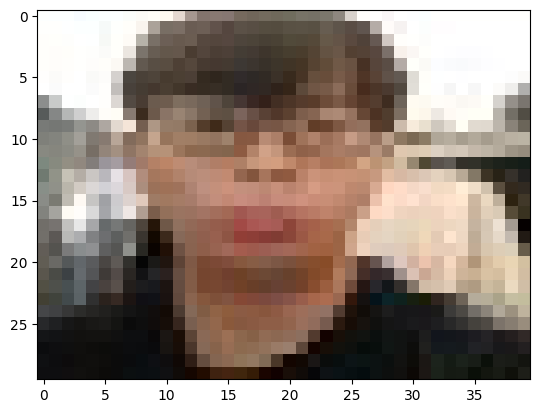

In [78]:
import matplotlib.pyplot as plt
img_data = tf.keras.utils.load_img('/content/drive/MyDrive/AI/Name_class/Test/Chi/chi49.jpg', target_size = (30,40))
img_data = tf.keras.utils.img_to_array(img_data)
plt.imshow(img_data/255)

In [79]:
img_data

array([[[253., 255., 254.],
        [252., 255., 255.],
        [252., 255., 255.],
        ...,
        [255., 255., 253.],
        [255., 255., 253.],
        [255., 255., 253.]],

       [[255., 255., 253.],
        [255., 255., 253.],
        [254., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 254., 251.],
        [255., 255., 251.],
        [254., 254., 252.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[ 11.,  12.,  14.],
        [ 14.,  14.,  16.],
        [ 15.,  15.,  15.],
        ...,
        [ 24.,  24.,  26.],
        [ 26.,  24.,  25.],
        [ 35.,  31.,  32.]],

       [[ 15.,  16.,  18.],
        [ 13.,  13.,  15.],
        [ 13.,  11.,  12.],
        ...,
        [ 27.,  29.,  24.],
        [ 25.,  27.,  22.],
        [ 19.,  20.,  15.]],

       [[ 14.,  14.,  16.],
        [ 14.,  14.,  16.],
        [ 16.,  

In [80]:
img_data.shape

(30, 40, 3)

In [81]:
x = img_data/255

In [83]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [82]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 30, 40, 3)

In [84]:
model.predict(img_data)

1/1 [==============================] - 0s 157ms/step


array([[0.0000000e+00, 1.0000000e+00, 2.6568119e-23, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4926785e-18,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)
a==1
array([ True])

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/AI/Name_class/Test/Chi/chi49.jpg', target_size = (30,40))
test_image = tf.keras.utils.img_to_array(test_image)
plt.imshow(test_image/255)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print('r', result)
print('Cat' if (result == False) else 'Dog')